In [53]:
# importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import training data
train_df = pd.read_csv('sales_train_v2.csv')

# import information on shops
shops_df = pd.read_csv('shops.csv')

# import information on items
items_df = pd.read_csv('items.csv')

# import information on categories
categories_df = pd.read_csv('item_categories.csv')

In [3]:
# looking at description of training data
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [4]:
# checking missing values in training data
train_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [5]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
# count number of unique items
train_df['item_id'].nunique()

21807

In [7]:
# count the number of times each item was sold OR returned 
number_of_items = train_df.groupby('item_id').size()#.sort_values(ascending=False)
number_of_items_df = pd.DataFrame([])
number_of_items_df['item_num'] = list(number_of_items)
number_of_items_df.head()

,item_num
0,1
1,6
2,2
3,2
4,1


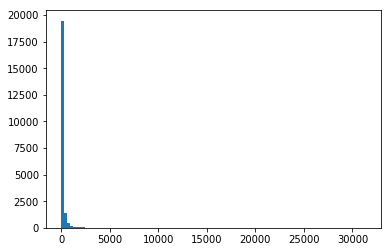

In [8]:
fig = plt.hist(number_of_items_df['item_num'], bins=101)


In [9]:
# items that have been sold at least 50 times give 94% of all sales
number_of_items_df[number_of_items_df['item_num'] > 50].sum()/2.935849e+06

item_num    0.939203
dtype: float64

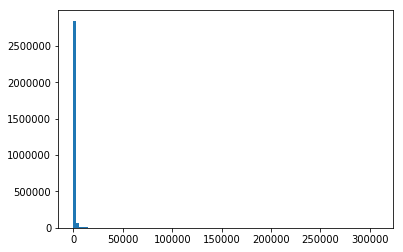

In [10]:
# items sorted by their price
fig = plt.hist(train_df['item_price'], bins=101)


In [11]:
# items under 300 Rubles give 94% of all sales
train_df[train_df['item_price'] < 3000].shape[0]/2.935849e+06

0.9689132513286617

In [12]:
train_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [13]:
items_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
shops_df.head()

In [ ]:
categories_df.head()

In [17]:
train_df = train_df.merge(items_df, on = 'item_id',how='left')
train_df = train_df.merge(shops_df, on = 'shop_id',how='left')
train_df = train_df.merge(categories_df, on = 'item_category_id',how='left')
train_df.head()

In [40]:
# check if the item prices are always the same
gb = train_df[['item_id','item_price']].groupby(['item_id']).agg(['min', 'max'], axis="columns")
gb['item_price']['min'] - gb['item_price']['max']

item_id
0           0.00
1           0.00
2           0.00
3         -42.00
4           0.00
5           0.00
6           0.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13          0.00
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19          0.00
20          0.00
21          0.00
22          0.00
23          0.00
24          0.00
25          0.00
26          0.00
27      -2001.00
28       -423.00
29      -1521.00
          ...   
22140    -339.53
22141    -129.00
22142       0.00
22143    -124.00
22144    -499.00
22145    -350.00
22146    -316.00
22147    -121.00
22148       0.00
22149    -121.00
22150     -66.22
22151    -131.00
22152     -73.00
22153    -166.33
22154    -700.00
22155    -684.00
22156       0.00
22157     -91.00
22158       0.00
22159       0.00
22160    -121.00
22161       0.00
22162    -371.00
22163     -78.77
22164    -369.38
22165       0.00
22166       0.00
22167 

In [54]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [68]:
gr = train_df[['date_block_num','shop_id','item_id','item_price','item_cnt_day']].groupby(['date_block_num','shop_id','item_id'], as_index = False)
gr.agg({"item_price": "mean","item_cnt_day": "sum"}).head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0


In [71]:
train_df[(train_df['date_block_num'] == 0) & (train_df['shop_id'] == 0) & (train_df['item_id'] == 32)]\
[['date_block_num','shop_id','item_id','item_price','item_cnt_day']]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
40085,0,0,32,221.0,2.0
40086,0,0,32,221.0,2.0
40087,0,0,32,221.0,1.0
40088,0,0,32,221.0,1.0
